# Problem 1.

주사위 두 개를 굴려서 나온 눈의 수를 사용해서 두 자리 숫자를 크게 만드는 사람이 이기는 게임이다. 주사위를 처음 굴려서 나온 눈의 수를 10의 자리와 1의 자리 중 어느 곳에 사용할 지 먼저 결정해야 한다. 그런 다음 두 번째로 주사위를 굴려서 나온 눈의 수는 자동으로 남은 자리의 숫자로 사용된다.

예를 들어, 첫 번째 주사위가 3인데 10의 자리로 결정했고, 두 번째 6이 나왔다면 결과는 36이 된다.  

어떤 전략을 사용해야 게임에 이길 가능성이 가장 클까?

## Data

In [3]:
import pandas as pd

df = pd.read_csv('two_dice.csv')
df

,dice1,dice2
0,1,4
1,1,2
2,5,3
3,6,2
4,3,3
...,...,...
999995,3,3
999996,2,6
999997,4,5
999998,3,2


## Optimal Solution

In [70]:
df['optimal_score'] = df.apply(lambda row: row['dice2'] * 10 + row['dice1']
                        if row['dice1'] < 4 else row['dice1'] * 10 + row['dice2'], axis=1)

print(f"총점수: {sum(df['optimal_score'])}")
print(f"평균: {sum(df['optimal_score']) / len(df)}")

총점수: 45241257
평균: 45.241257


**최적의 방법은 첫 번째 주사위가 1,2,3이 나온다면 1의 자리에 사용하도록 선택하고 4,5,6이 나온다면 10의 자리에 사용하는 것이 최적의 방법이다.**

위의 코드는 최적의 방법을 구현한 코드이다.

## Graph

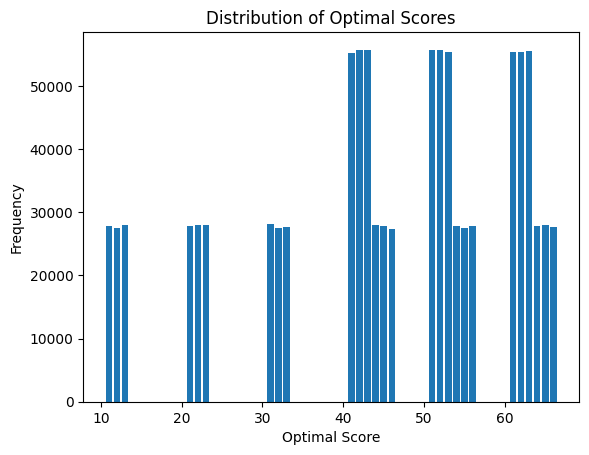

In [91]:
import matplotlib.pyplot as plt

score_counts = df['optimal_score'].value_counts()
plt.bar(score_counts.index, score_counts.values)

plt.title('Distribution of Optimal Scores')
plt.xlabel('Optimal Score')
plt.ylabel('Frequency')

plt.show()

`-` 최적의 방법을 사용했을 때 어떤 수가 많이 나오는지를 시각화한 것이다. 40 이상의 비교적 큰 수들의 빈도가 많은 것을 보아 최적의 방법이 잘 동작하고 있다는 것을 알 수 있다.

## Expectation

In [100]:
e_df = pd.DataFrame(df['optimal_score'].value_counts() / len(df)).reset_index()
e_df['Expectation'] = e_df['optimal_score'] * e_df['count']
e_df['Expectation'].sum()

45.241257

**표본이 충분히 많다면 표본평균은 기댓값(모평균 $μ$)과 매우 유사해진다.**

`-` 위의 예에서는 표본의 크기가 100만으로 매우 크기에 소수 6번 째 자리까지 같게 계산된다.

# Problem 2.

주사위 3개를 굴려서 나온 눈의 수를 사용해서 세자리 숫자를 가장 크게 만드는 사람이 이기는 게임이다.

주사위를 처음 굴려서 나온 눈의 수를 세자리 숫자에서 어느 곳에 사용할 지 먼저 결정한다. 그런 다음 두 번째로 굴린 주사위에서 나온 눈의 수는 남은 두자리의 숫자 중 하나로 결정한다. 세 번째 나온 주사위 눈수는 자동으로 남은 숫자로 사용된다.

예를 들어, 첫 번째 주사위가 3인데 10의 자리로 결정했고, 두 번째 6이 나와 100의 자리 숫자에 사용하고, 세 번째 주사위 눈수가 1이면 결과는 631이 된다. 

어떤 전략이 최선의 전략인가?

## Data

In [8]:
df2 = pd.read_csv('three_dice.csv')
df2

,dice1,dice2,dice3
0,5,2,4
1,4,2,3
2,4,2,5
3,2,5,4
4,5,5,5
...,...,...,...
999995,5,4,4
999996,5,1,3
999997,4,3,2
999998,3,3,6


## Optimal Solution

In [9]:
def get_optimal_score(dice1, dice2, dice3):
    positions = {'A': None, 'B': None, 'C': None} # 숫자의 위치를 저장할 딕셔너리
                 # A: one , B: ten , C: hundred
    
    # 첫 번째 주사위 배치 결정
    if dice1 in [1, 2]: # 1,2 -> 1의자리 배치
        positions['A'] = dice1
    elif dice1 in [3, 4]: # 3,4 -> 10의 자리 배치
        positions['B'] = dice1
    else: # 5,6 -> 100의 자리 배치
        positions['C'] = dice1

    # 두 번째 주사위 배치 결정
    remaining_positions = [pos for pos, val in positions.items() if val is None] # 아직 숫자가 배치되지 않은 자리를 리스트로 저장
    if dice2 in [1, 2, 3]:  # 작은 자리부터 채우기
        remaining_positions.sort()  # 작은 자리 먼저 (A(one) -> B(ten) 순서)
    else:  # 큰 자리부터 채우기
        remaining_positions.sort(reverse=True)  # 큰 자리 먼저 (B(ten) -> A(one) 순서)
    
    positions[remaining_positions[0]] = dice2  # 두 번째 주사위 배치

    # 세 번째 주사위는 남은 자리에 배치
    remaining_position = [pos for pos, val in positions.items() if val is None][0]
    positions[remaining_position] = dice3

    # 3자리 숫자 생성
    optimal_score = positions['C'] * 100 + positions['B'] * 10 + positions['A']
    return optimal_score

# optimal_score 열 추가
df2['optimal_score'] = df2.apply(lambda row: get_optimal_score(row['dice1'], row['dice2'], row['dice3']), axis=1)

print(f"총점수: {df2['optimal_score'].sum()}")
print(f"평균: {df2['optimal_score'].mean()}")

총점수: 503895228
평균: 503.895228


`1` **최적의 방법은 첫 번째 주사위가 1,2가 나온다면 1의 자리에 사용하도록 선택하고 3,4가 나온다면 10의 자리에 사용, 5,6이 나온다면 100의 자리에 사용한다.**

`2` **그 후 두 번째 주사위의 결과가 1,2,3이라면 남은 자리 중 작은 자리에 사용하고 4,5,6이라면 남은 자리 중 큰 자리에 사용한다.**

`3` **세 번째 주사위는 자동으로 남은 자리에 가게 된다. 이렇게 먼저 번호마다 자리를 정한 후에 3자리 수를 생성해주는 것이 최적의 방법이다.**

## Graph

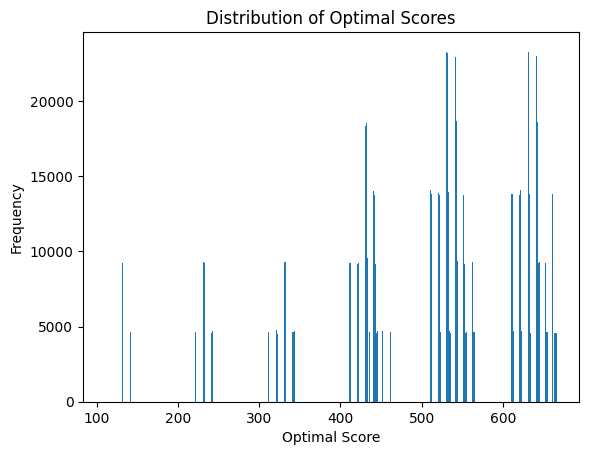

In [10]:
import matplotlib.pyplot as plt

score_counts = df2['optimal_score'].value_counts()
plt.bar(score_counts.index, score_counts.values)

plt.title('Distribution of Optimal Scores')
plt.xlabel('Optimal Score')
plt.ylabel('Frequency')

plt.show()

`-` 최적의 방법을 사용했을 때 어떤 수가 많이 나오는지를 시각화한 것이다. 400 이상의 비교적 큰 수들의 빈도가 많은 것을 보아 최적의 방법이 잘 동작하고 있다는 것을 알 수 있다.

## Expectation

In [11]:
e_df = pd.DataFrame(df2['optimal_score'].value_counts() / len(df2)).reset_index()
e_df['Expectation'] = e_df['optimal_score'] * e_df['count']
e_df['Expectation'].sum()

503.8952279999998

**표본이 충분히 많다면 표본평균은 기댓값(모평균 $μ$)과 매우 유사해진다.**

`-` 위의 예에서는 표본의 크기가 100만으로 매우 크기에 반올림 한다면 소수 6번 째 자리까지 같게 계산된다.